   year state    month  number       date
0  1998  Acre  Janeiro     0.0 1998-01-01
1  1999  Acre  Janeiro     0.0 1999-01-01
2  2000  Acre  Janeiro     0.0 2000-01-01
3  2001  Acre  Janeiro     0.0 2001-01-01
4  2002  Acre  Janeiro     0.0 2002-01-01
5  2003  Acre  Janeiro    10.0 2003-01-01
6  2004  Acre  Janeiro     0.0 2004-01-01
7  2005  Acre  Janeiro    12.0 2005-01-01
8  2006  Acre  Janeiro     4.0 2006-01-01
9  2007  Acre  Janeiro     0.0 2007-01-01


      year      state     month  number       date
6444  2007  Tocantins  Dezembro    13.0 2007-01-01
6445  2008  Tocantins  Dezembro     7.0 2008-01-01
6446  2009  Tocantins  Dezembro    46.0 2009-01-01
6447  2010  Tocantins  Dezembro    72.0 2010-01-01
6448  2011  Tocantins  Dezembro   105.0 2011-01-01
6449  2012  Tocantins  Dezembro   128.0 2012-01-01
6450  2013  Tocantins  Dezembro    85.0 2013-01-01
6451  2014  Tocantins  Dezembro   223.0 2014-01-01
6452  2015  Tocantins  Dezembro   373.0 2015-01-01
6453  2016  Tocantins  Dez

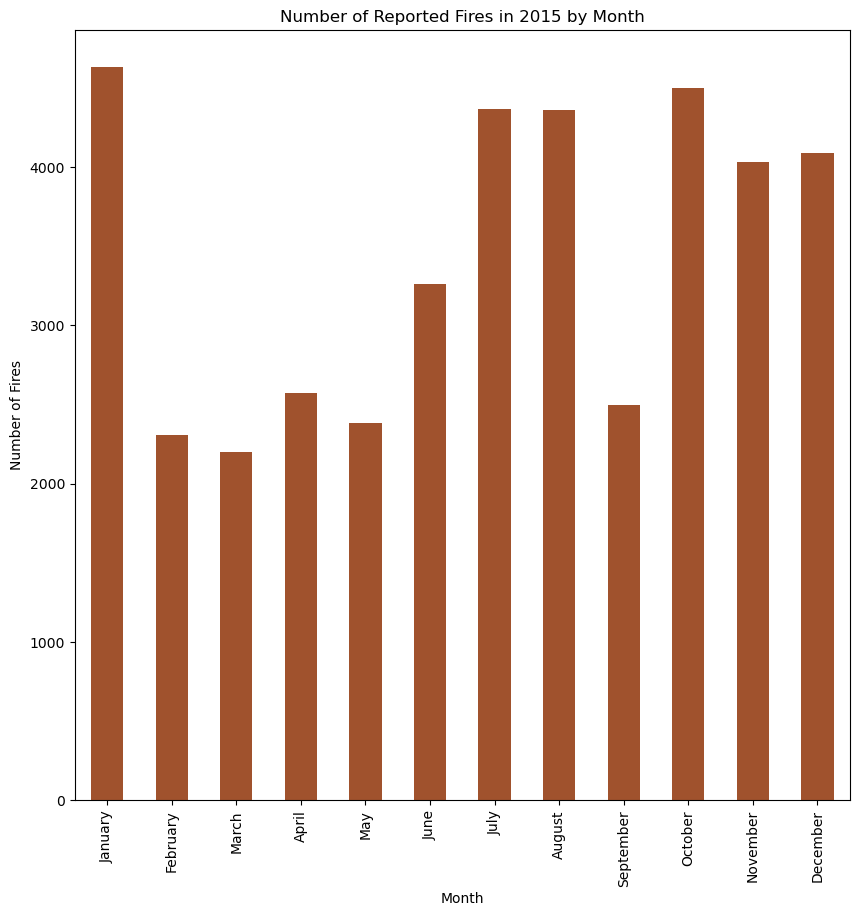



                      number
state                       
Sao Paulo         213.896226
Mato Grosso       203.479975
Bahia             187.222703
Piau              158.174674
Goias             157.721841
Minas Gerais      156.800243
Tocantins         141.037176
Amazonas          128.243218
Ceara             127.314071
Paraiba           111.073979
Maranhao          105.142808
Pará              102.561272
Pernambuco        102.502092
Roraima           102.029598
Santa Catarina    101.924067
Amapa              91.345506
Rondonia           84.876272
Acre               77.255356
Rio                64.698515
Espirito Santo     27.389121
Alagoas            19.271967
Distrito Federal   14.899582
Sergipe            13.543933


These are the states which reported fires in the month of December, along with the number of fires reported in total.
                    number
state                     
Acre                47.000
Alagoas            964.000
Amapa             4504.000
Amazonas          

In [1]:
import pandas as pd
import matplotlib.pyplot as plot

pd.options.mode.chained_assignment = None  # default='warn
source_df = pd.read_excel(r"C:\Users\Julian Quijano\Desktop\CSV\amazon.xlsx")

# 1. Display top 10 rows of the dataset.
print(source_df.head(10))
print("\n")

# 2. Check last 10 rows.
print(source_df.tail(10))
print("\n")

# 3. Find shape of the dataset (number of rows and number of columns).
df_columns = source_df.shape[1]
df_rows = source_df.shape[0]
print("The dataset has", df_columns, "columns and", df_rows, "rows.")
print("\n")

# 4. Get information about the dataset like total number rows, total number of columns, datatypes of each column and memory requirement.
source_df.info()
print("\n")

# 5. Check for duplicate data and drop them.
clean_df = source_df.drop_duplicates().reset_index()

# 6. Check null values in the dataset.
clean_df.fillna(0)

# 7. Get overall statistics about the dataframe.
overall_statistics = clean_df.describe(include='all')
print(overall_statistics)

# 8. Rename month names to English.

clean_df['month'].replace('Janeiro', 'January', inplace=True)
clean_df['month'].replace('Fevereiro', 'February', inplace=True)
clean_df['month'].replace('Março', 'March', inplace=True)
clean_df['month'].replace('Abril', 'April', inplace=True)
clean_df['month'].replace('Maio', 'May', inplace=True)
clean_df['month'].replace('Junho', 'June', inplace=True)
clean_df['month'].replace('Julho', 'July', inplace=True)
clean_df['month'].replace('Agosto', 'August', inplace=True)
clean_df['month'].replace('Setembro', 'September', inplace=True)
clean_df['month'].replace('Outubro', 'October', inplace=True)
clean_df['month'].replace('Novembro', 'November', inplace=True)
clean_df['month'].replace('Dezembro', 'December', inplace=True)

print('\n')
print(clean_df['month'])
print('\n')

clean_df['date'] = clean_df['date'].astype(str)
clean_df['year'] = clean_df['year'].astype(str)
clean_df['index'] = clean_df['index'].astype(str)

# 9. Get the total number of fires registered.
total_fires = clean_df['number'].sum()
print(total_fires, 'total fires\n')

# 10. In which month maximum number of forest fires were reported?

max_fire = clean_df.loc[clean_df['number'].idxmax()]
print(max_fire)

print("\nSeptember was the month with the most fires, with 998 fires reported in a single month.\n")

# 11. In which year maximum number of forest fires was reported?

print("2008 was the year with the most amount of forest fires, with 998 forest fires that year.\n")

# 12. In which state maximum number of forest fires was reported?

print("The state in which the maximum number of forest fires was reported is Amazonas.\n")

# 13. Find total number of fires were reported in Amazonas.

print(clean_df.groupby(['state']).sum(['number']))
print('\n')
print("The total number of fires reported in the Amazonas is 30650.\n")

# 14. Display number of fires were reported in Amazonas (year-wise).

print(clean_df.groupby(['year']).sum(['number']))
print('\n')

# 15. Display number of fires were reported in Amazonas (day-wise).

print(clean_df.groupby(['date']).sum(['number']))
print("\n")

# 16. Find total number of fires were reported in 2015 and visualize data based on each ‘month’.

fires_2015 = clean_df[(clean_df['year'] == '2015')].groupby('month', sort=False).sum(['number']).reset_index()
print(fires_2015)

fig1 = fires_2015.plot(x='month', y='number', kind='bar', title='Number of Reported Fires in 2015 by Month', color='sienna', legend=False, figsize=(10, 10))
fig1.set_xlabel('Month')
fig1.set_ylabel('Number of Fires')
plot.show()
print('\n')

# 17. Find average number of fires were reported from highest to lowest (state-wise).

ave_fire = clean_df.groupby(['state']).mean(['number'])
print(ave_fire.sort_values('number', ascending=False))
print('\n')

# 18. Find the state names where fires were reported in 'dec' month.

dec_fires = clean_df[(clean_df['month'] == 'December') & (clean_df['number'] > 0)].groupby('state').sum(['number'])
print("These are the states which reported fires in the month of December, along with the number of fires reported in total.\n")
print(dec_fires)